# Technical Indicators

## SMA

Simple Moving Average (SMA) is a technical indicator that is commonly used in financial analysis and trading. Moving averages are versatile tools that can be used to identify trends, support and resistance levels, and other trading opportunities.

Simple moving averages can be used in various ways, including:

- Trend Identification: Moving averages can help identify the overall trend of a security by smoothing out fluctuations in the price.
- Support and Resistance: Moving averages can act as support or resistance levels, as they provide a visual representation of the average price of a security over a given time period.
- Buy and Sell Signals: Moving averages can be used to generate buy and sell signals by combining them with other technical indicators or chart patterns.
- Momentum Indicator: Moving averages can be used as a momentum indicator, which measures the rate of change in the price of a security.

## EMA

An Exponential Moving Average (EMA) is a technical indicator that is often used in financial analysis and trading. Its use cases and calculations are very similar to Simple Moving Averages (SMA) but with an added variable of weights.

Unlike Simple Moving Averages which give equal weight to every period, Exponential Moving Averages give higher weights to the most recent periods, as to better reflect the latest price action.

Exponential moving averages can be used in various ways, including:

- Trend Identification: Moving averages can help identify the overall trend of a security by smoothing out fluctuations in the price.
- Support and Resistance: Moving averages can act as support or resistance levels, as they provide a visual representation of the average price of a security over a given time period.
- Buy and Sell Signals: Moving averages can be used to generate buy and sell signals by combining them with other technical indicators or chart patterns.
- Momentum Indicator: Moving averages can be used as a momentum indicator, which measures the rate of change in the price of a security.


# Trading Strategy

## Chose Underlying Asset

- Select Highly liquid stocks with a history of significant price movements.This liquidity is crucial for finding options with tighter bid-ask spreads.

## Technical Indicators

- Moving Averages use the crossover of a short-term MA (10 days) above a long term MA (50 days) as bullish signal. Conversely, a crossover below signals bearish conditions.
- Relative strength index (RSI): An RSI below 30 indicates oversold conditions (potential for bullish reversal), while 70 suggests overbought conditions (potential for bearish reversal)
- Support and Resistance Levels: Identify key price levels. Buying calls when the price bounces of a support or buying puts when it falls from resistance can be effective.

## Strategy for Buying Calls

- Bullish Signal: Look for a bullish crossover in MAs, RSI moving above 30 (indicating a move from oversold to normal), and a bounce off a support level.
- Timing: Buy calls 20-30 days to expiration to balance between time decay and the cost of the option. Opt for slightly out-of-the-money (OTM) calls to potentially increase returns.
- Exit Plan: Set a profit target based on resistance levels or a percentage gain. Implement a stop-loss to limit losses if the trade moves against you.

## Strategy for Buying Puts

- Bearish Signal: A bearish MA crossover, RSI moving below 70 (indicating a move from overbought to normal), and a rejection at a resistance level suggest a bearish turn.
- Timing: Purchase puts 20-30 days to expiration. Choose slightly OTM puts to manage costs while retaining the potential for profit.
- Exit Plan: Define a profit target based on support levels or a set percentage gain. Use a stop-loss to protect against significant losses.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import yfinance as yf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Back testing
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [7]:
API_KEY = 'ec2d6f3b0cc9395fbce02f1316669229'
ticker = 'CCJ'

In [12]:
#Earning calendar 
url = f'https://financialmodelingprep.com/api/v3/historical/earning_calendar/{ticker}L&apikey={API_KEY}'
calendar = pd.read_json(url)
print(calendar)

HTTPError: HTTP Error 401: Unauthorized

In [9]:
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/{ticker}?type=rsi&period=10&apikey={API_KEY}'
data = pd.read_json(url)
RSI = pd.DataFrame(data)

In [10]:
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/{ticker}?type=sma&period=10&apikey={API_KEY}'
data = pd.read_json(url)
SMA10 = pd.DataFrame(data)

In [11]:
url = f'https://financialmodelingprep.com/api/v3/technical_indicator/1day/{ticker}?type=sma&period=50&apikey={API_KEY}'
data = pd.read_json(url)
SMA50 = pd.DataFrame(data)

In [10]:
for x in [RSI, SMA10]: 
    x.drop(['open', 'high', 'low', 'volume', 'date'], axis=1, inplace=True)

In [11]:
#Renam SMA Columns to their periods 
SMA10.rename(columns={'sma':'SMA10'}, inplace=True)
SMA50.rename(columns={'sma':'SMA50'}, inplace=True)

In [12]:


data = pd.concat([SMA50, SMA10, RSI], axis='columns', join='inner')
data = data.sort_values(by='date')

In [13]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [14]:
#drop duplicate columns
data = data.loc[:,~data.columns.duplicated()]

In [15]:
data

,open,high,low,close,volume,SMA50,SMA10,rsi
date,,,,,,,,
2019-04-11,11.77,11.97,11.54,11.96,2379700,12.0068,11.765,111.269300
2019-04-12,12.05,12.12,11.75,11.77,1389100,11.9998,11.763,68.927243
2019-04-15,11.77,11.78,11.61,11.67,1563500,11.9910,11.745,56.380538
2019-04-16,11.71,11.71,11.56,11.62,1152900,11.9678,11.737,51.202584
2019-04-17,11.68,11.81,11.66,11.77,1399000,11.9444,11.756,62.639731
...,...,...,...,...,...,...,...,...
2024-04-03,47.86,49.98,47.74,49.86,7506781,43.6476,44.220,78.317364
2024-04-04,49.53,50.43,48.22,48.36,6142299,43.6684,44.858,68.717616
2024-04-05,48.43,50.08,47.80,49.21,3315227,43.7038,45.515,70.958914


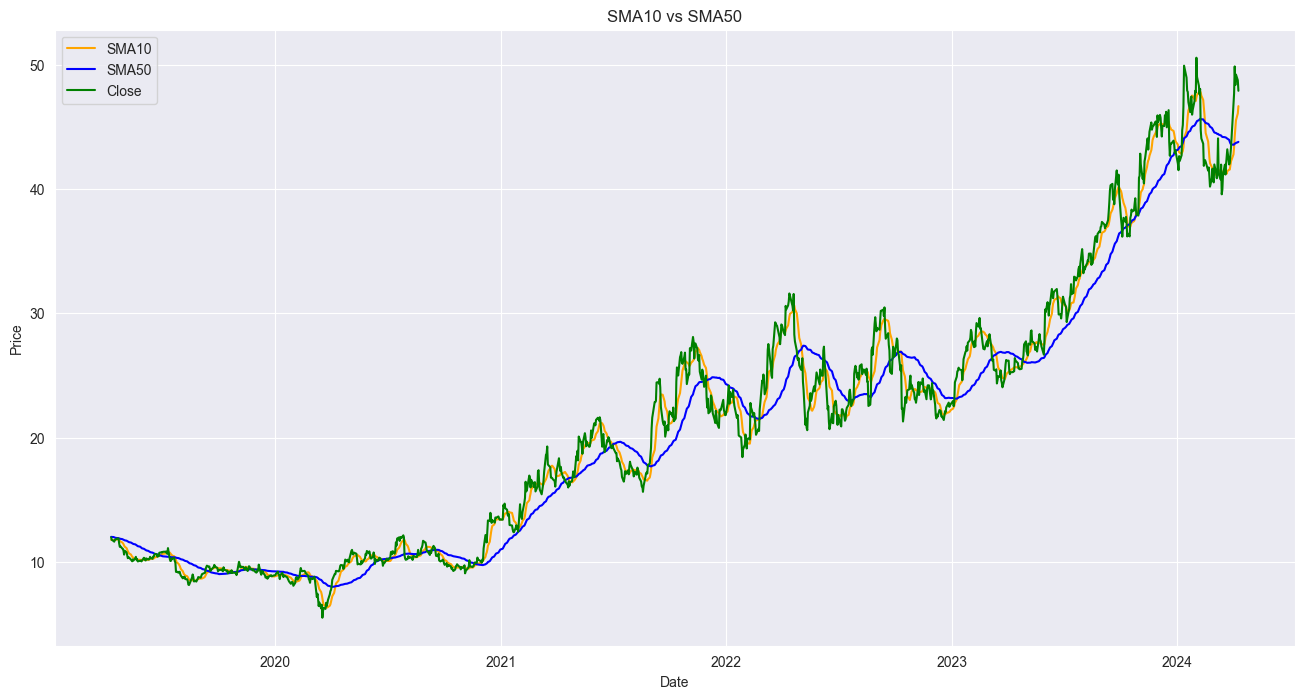

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(data['SMA10'], label='SMA10', color='orange')
plt.plot(data['SMA50'], label='SMA50', color='blue')
plt.plot(data['close'], label='Close', color='green')
plt.title('SMA10 vs SMA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [17]:
#pct_change
data['daily_return']= data['close'].pct_change(-1) * 100 * -1

In [18]:
data['change_direction'] = np.where(data['daily_return'] > 0, 'UP', 'DOWN')

In [19]:
data = data.dropna()

In [20]:
data['change_direction'].value_counts()

DOWN    641
UP      615
Name: change_direction, dtype: int64

In [21]:
#capitalize the first letter of each column
data.columns = data.columns.str.capitalize()

In [22]:
data

,Open,High,Low,Close,Volume,Sma50,Sma10,Rsi,Daily_return,Change_direction
date,,,,,,,,,,
2019-04-11,11.77,11.97,11.54,11.96,2379700,12.0068,11.765,111.269300,-1.614274,DOWN
2019-04-12,12.05,12.12,11.75,11.77,1389100,11.9998,11.763,68.927243,-0.856898,DOWN
2019-04-15,11.77,11.78,11.61,11.67,1563500,11.9910,11.745,56.380538,-0.430293,DOWN
2019-04-16,11.71,11.71,11.56,11.62,1152900,11.9678,11.737,51.202584,1.274427,UP
2019-04-17,11.68,11.81,11.66,11.77,1399000,11.9444,11.756,62.639731,0.169635,UP
...,...,...,...,...,...,...,...,...,...,...
2024-04-02,46.26,47.69,45.71,47.68,4701754,43.5740,43.350,73.469575,4.372242,UP
2024-04-03,47.86,49.98,47.74,49.86,7506781,43.6476,44.220,78.317364,-3.101737,DOWN
2024-04-04,49.53,50.43,48.22,48.36,6142299,43.6684,44.858,68.717616,1.727291,UP



## Machine Learning Model

In [23]:
y = data.Change_direction
x = data[['Close', 'High', 'Low', 'Volume']]

In [24]:
#make uppercase just the first letter of each column
x.columns = x.columns.str.capitalize()

In [25]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
model = DecisionTreeClassifier()

In [27]:
model.fit(X=x_train, y=y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(X=x_test) 

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5357142857142857


In [30]:
#comparison data frame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
date,,
2019-04-18,UP,UP
2021-03-29,DOWN,DOWN
2019-06-26,DOWN,UP
2023-03-08,UP,DOWN
2020-01-07,DOWN,UP
...,...,...
2023-08-25,UP,DOWN
2019-05-28,UP,UP
2020-11-20,DOWN,DOWN


In [31]:
comp  = comparison['Actual'] == comparison['Predicted']

In [32]:
comp.sum()

135

In [33]:
len(comp)

252

In [34]:
comp.sum() / len(comp)

0.5357142857142857

## Backtesting

In [35]:

x_today = x.iloc[[-1], :]

In [36]:
x_today

,Close,High,Low,Volume
date,,,,
2024-04-08,48.75,49.26,47.19,4161976


In [37]:
forecast = model.predict(x_today)[0]

In [38]:
forecast

'DOWN'

In [39]:
data.sort_index(inplace=True)

In [40]:
data

,Open,High,Low,Close,Volume,Sma50,Sma10,Rsi,Daily_return,Change_direction
date,,,,,,,,,,
2019-04-11,11.77,11.97,11.54,11.96,2379700,12.0068,11.765,111.269300,-1.614274,DOWN
2019-04-12,12.05,12.12,11.75,11.77,1389100,11.9998,11.763,68.927243,-0.856898,DOWN
2019-04-15,11.77,11.78,11.61,11.67,1563500,11.9910,11.745,56.380538,-0.430293,DOWN
2019-04-16,11.71,11.71,11.56,11.62,1152900,11.9678,11.737,51.202584,1.274427,UP
2019-04-17,11.68,11.81,11.66,11.77,1399000,11.9444,11.756,62.639731,0.169635,UP
...,...,...,...,...,...,...,...,...,...,...
2024-04-02,46.26,47.69,45.71,47.68,4701754,43.5740,43.350,73.469575,4.372242,UP
2024-04-03,47.86,49.98,47.74,49.86,7506781,43.6476,44.220,78.317364,-3.101737,DOWN
2024-04-04,49.53,50.43,48.22,48.36,6142299,43.6684,44.858,68.717616,1.727291,UP


In [41]:
class MAOptionStrategy(Strategy):
    def init(self):
        self.sma10 = self.I(lambda x: x, self.data.Sma10)
        self.sma50 = self.I(lambda x: x, self.data.Sma50)

    def next(self):
        # Entry: Buy when Sma10 crosses above Sma50 if not already in position
        if not self.position:
            if crossover(self.sma10, self.sma50):
                self.buy()
        # Exit: Sell when Sma50 crosses above Sma10 or add your specific exit criteria
        else:
            if crossover(self.sma50, self.sma10):
                self.position.close()

# Assuming 'data' is your DataFrame properly formatted and indexed by DateTime
bt = Backtest(data, MAOptionStrategy, cash=10_000, commission=.002)
stats = bt.run()
print(stats)

Start                     2019-04-11 00:00:00
End                       2024-04-08 00:00:00
Duration                   1824 days 00:00:00
Exposure Time [%]                   56.847134
Equity Final [$]                  16527.89684
Equity Peak [$]                   21050.71704
Return [%]                          65.278968
Buy & Hold Return [%]              307.608696
Return (Ann.) [%]                   10.606974
Volatility (Ann.) [%]               41.497915
Sharpe Ratio                         0.255603
Sortino Ratio                        0.458844
Calmar Ratio                           0.3387
Max. Drawdown [%]                   -31.31674
Avg. Drawdown [%]                   -8.558819
Max. Drawdown Duration      543 days 00:00:00
Avg. Drawdown Duration       60 days 00:00:00
# Trades                                   19
Win Rate [%]                        47.368421
Best Trade [%]                        60.5107
Worst Trade [%]                     -16.56642
Avg. Trade [%]                    

In [42]:
bt.plot()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fi

GridPlot(id='p1325', ...)

## New Trading Strategy


In [16]:
from pandas_datareader import data
import yfinance as yf 
import quandl  

In [14]:
ticker = 'CCJ'
df = yf.download(ticker, start='2000-01-01', end='2024-04-11')

[*********************100%***********************]  1 of 1 completed


In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,2.562500,2.562500,2.500000,2.520833,1.804084,32400
2000-01-04,2.479167,2.489583,2.458333,2.489583,1.781719,6600
2000-01-05,2.489583,2.520833,2.479167,2.489583,1.781719,125400
2000-01-06,2.500000,2.500000,2.458333,2.468750,1.766810,15600
2000-01-07,2.458333,2.468750,2.437500,2.458333,1.759355,18000


In [23]:
df1  =  quandl.get("WIKI/AAPL", start='2000-01-01', end='2024-04-11')

In [24]:
df1

# Options
Pay off from a call option  
K = Strike price 
St = final price of the underlying asset 
max(St-K,0)
if St>K --> Option will be excercised 
and if St <= K will not be excercised

pay off from a short position call option 
-max(St-K,0) = min(K-St,0) 

The payoff to the holder of a long position  put option 
max(K-St,0) 

The pay off from  a shor put is 
-max(K-St,0) = min(St-K,0)

## Call Option 
S = Stock Price
K = Strike Price 
if S > K --> in the money 

if S = K --> At the money

if S < K --> Out of the Money 

## Put Option 

if S < K --> in the money 

if S = K --> at the money

if S > K --> out of the money 

## Intrinsic Value 
Is define as the value it would have if there were no time to maturity, so that the excercise decision has to be made immediatley 
For a call option the intrinsic value  = max(S-K,0) 
For a put max(K-S,0) 

The excess of an options value over its intrinsic value is the options time value. The total value of an option is therefore the sum of its intrinsic value and its time value 


# Factors Affecting Option Prices

S = Current Stock Price
K = Strike Price
T = Time to Expiration
ò = Volatility of the stock price
r = Risk free rate of return


S0 = Current Stock Price
K = Strike Price
T = Time to Expiration
St = Stock price at time T(Expiration)
r = continuously compounded risk-free rate of interest for an investment maturing at time T(Expiration)
C = value of an American call option
P = value of an American put option
c = value of a European call option
p = value of a European put option


## Upper Bounds 
C <= S0
c <= S0
If this were not the case, it would be possible to make a riskless profit by buying the stock and selling the call option.

P <= K (American)
p <= ke^(-rT) (European)
If this were not the case, it would be possible to make a riskless profit by buying the option and investing the proceeds at the risk-free rate.

